# Case Study-2 :

Consider parameters for the above problem:

Average card balance is Rs 1000,

Each card has an interest rate of 15%,

Membership fee is Rs 20 per card,

Loss rate is 3%,

Rs 25 operating cost per card,

Rs 10 affiliation fee per card (cost to the group organization itself, so that their members get this awesome card program),

6.5% cost of funds (that credit card company must pay to the bank where it gets money),

Bill/statement is issued on 1st of every month,

Credit-free period = 15 days from the bill/statement issue date.

In [60]:
# Libraries to be used in the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Assumptions:-
    
    Assuming 90% customers paid on time,
    
    Assuming 2% paid 30 days after due date,
    
    Assuming 2% paid 45 days after due date,
    
    Assuming 1% paid 60 days after due date,
    
    Assume average day of transaction as 15th of billing cycle.

In [61]:
# Initialization of the given parameters

total_cust=1000
cust_no_delay=90/100
cust_30_days=2/100 
cust_45_days=2/100 
cust_60_days=1/100

#Monthly average balance
month_bal=1000

# Source of Revenue per year
mem_fee=12*20*total_cust # membership fee is Rs 20 per card
affil_fee=12*10*total_cust # Rs 10 affiliation fee per card
int_rate=15/100 # Interest rate

# Expenses per year
cost_of_funds=12*total_cust*1000*0.065/12 # Bank lending money to the credit card company
operating_cost=12*25*1000 # Rs 25 operating cost per card
loss_rate=3/100 # 3% loss due to non-payment of credit card bills

# Scenario 1

i) The interest rate is simple interest.

ii) Interest is calculated on a daily basis.

iii) The average card balance is the average end of month balance.

iv) All members are more than a year old.

In [62]:
# Category Table based on default date

day=30
categories=4
category_type=[]

for cust_category in range(categories):
    if cust_category==0:
        category_type.append('Paid before due date')
    else:
        category_type.append('Paid %d days after due date'%day)
        day=day+15     

Data_Calc=pd.DataFrame({'Category':category_type},index=np.arange(1,categories+1))
Data_Calc

,Category
1,Paid before due date
2,Paid 30 days after due date
3,Paid 45 days after due date
4,Paid 60 days after due date


Consider 1000 customers for both the scenario, divide these 1000 customers into following groups(upon your assumption and understanding about the credit lending industry).

1.customers who pay the bill within the credit-free period

2.customers paying 30 days after the last due date

3.customer paying 45 days after the last due date

4.customer paying 60 days after the last due date(remove these customers for the complete calculation of the next month,basically, you are not supposed to provide further credit services to these customers).

In [63]:
#Interest after 'N' days = N * outstanding balance * Interest rate per year/365

def interest_calc(payment_days):
    
    # Billing cycle starts from 1st of every month
    
    average_day_trans= 15    
    if payment_days==category_type[0]:
        Int_per_card=0
    #Int for 30 days
    elif payment_days==category_type[1]:
        Int_per_card=(average_day_trans+15+30) *month_bal*int_rate/365
    #Int for 45 days
    elif payment_days==category_type[2]:
        Int_per_card=(average_day_trans+15+45) *month_bal*int_rate/365
    #Int for 60 days
    else:
        Int_per_card=(average_day_trans+15+60) *month_bal*int_rate/365    
    return Int_per_card 

In [64]:
def total_int(column):
    
    payment_days=column[0]
    int_per_card=column[1]
    if payment_days==category_type[0]:
        total_interest=0
    # late by 30 days
    elif payment_days==category_type[1]:
        total_interest=12*int_per_card*cust_30_days*total_cust
    # late by 45 days
    elif payment_days==category_type[2]:
        total_interest=12*int_per_card*cust_45_days*total_cust
    # late by 60 days
    else:
        total_interest=12*int_per_card*cust_60_days*total_cust    
    return total_interest

In [65]:

def PnL_check(): # Column name based on profit/loss
    if net_profit_loss>=0:
        return 'Profit margin in percentage'
    else:
        return 'Loss margin in percentage'

In [66]:
Data_Calc['Estimated_Int_on_Default']=Data_Calc['Category'].apply(interest_calc).round(2)
Data_Calc['Total_Int_1Year']=Data_Calc[['Category','Estimated_Int_on_Default']].apply(total_int,axis=1)
Data_Calc['Fixed_Late_Fee_charge']=Data_Calc['Estimated_Int_on_Default'].apply(lambda x: 0 if x==0 else 50)
Data_Calc

,Category,Estimated_Int_on_Default,Total_Int_1Year,Fixed_Late_Fee_charge
1,Paid before due date,0.00,0.0,0
2,Paid 30 days after due date,24.66,5918.4,50
3,Paid 45 days after due date,30.82,7396.8,50
4,Paid 60 days after due date,36.99,4438.8,50


In [67]:
# Profit Generated

Expenses=cost_of_funds+operating_cost + (loss_rate*total_cust*month_bal)
Earnings=mem_fee+affil_fee+np.sum(Data_Calculations['Total_Interest_1Year'])+(12*max(Data_Calculations['Fixed_Late_Fee_charge'])*5/100*total_cust)
margin=Earnings-Expenses # margin earned above or below total amount spent
net_profit_loss=margin/Expenses*100
report=pd.DataFrame({'Total yearly card balance':12*month_bal*total_cust,'Earnings':Earnings,'Expenses':Expenses,
              'Margin':margin,PnL_check():net_profit_loss.round(2)},index=[' '])
report

,Total yearly card balance,Earnings,Expenses,Margin,Profit margin in percentage
,12000000,407754.0,395000.0,12754.0,3.23


# Scenario 2

    i) The interest rate is compounded quarterly.

    ii) Interest is calculated on a monthly basis.
    
    iii) Membership grows at 5% month on month.
    
    iv) Card balance grows at 5% per month for each member.

    v) The average card balance is the average end of month balance.

In [68]:
# Return new membership fee for each month

def membership_calc(mem_fee,monthly_growth): 
    monthly_mem_fee=[]
    for months in total_months:
        monthly_mem_fee.append(mem_fee)
        new_mem_fee=mem_fee+mem_fee*(monthly_growth)
        mem_fee=new_mem_fee  
    return monthly_mem_fee

In [69]:
# Return new balance for each month
def month_bal_calc(average_bal,monthly_growth):
    avg_month_bal=[]
    for months in total_months:
        avg_month_bal.append(average_bal)
        new_month_bal=average_bal+average_bal*(monthly_growth)
        average_bal=new_month_bal   
    return avg_month_bal 

In [70]:
# Given
total_months=np.arange(1,13) 
mem_fee=20 
affil_fee=10 
monthly_growth=0.05 
average_bal=1000 
late_fee=50

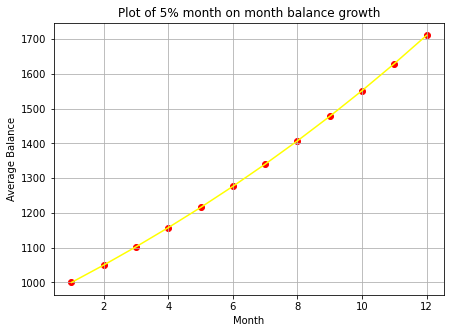

,Month,Month_on_Month_Bal,Membership_Fee
,1,1000.00,20.00
,2,1050.00,21.00
,3,1102.50,22.05
,4,1157.62,23.15
,5,1215.51,24.31
,6,1276.28,25.53
,7,1340.10,26.80
,8,1407.10,28.14
,9,1477.46,29.55
,10,1551.33,31.03


In [71]:
# call

per_month_fee=membership_calc(mem_fee,monthly_growth)
bal_per_month=month_bal_calc(average_bal,monthly_growth)
plt.figure(figsize=(7,5))
plt.title('Plot of 5% month on month balance growth')
plt.plot(total_months,bal_per_month,c='yellow')
plt.scatter(total_months,bal_per_month,c='r')
plt.xlabel('Month',fontsize=10)
plt.ylabel('Average Balance',fontsize=10)
plt.grid()
plt.show()

Data_Calc_scenario2=pd.DataFrame({'Month':total_months,'Month_on_Month_Bal':bal_per_month,'Membership_Fee':per_month_fee},index=[' ' for index in total_months]).round(2)
Data_Calc_scenario2

In [72]:
#Interest after 'M' months = M * [outstanding balance*(1+Interest rate per year/4)^4 - outstanding balance]/12

def interest_calc(month_bal):
    # Interest Compounded quarterly and caculated monthly
    Int_per_card=(month_bal*(1+int_rate/4)**4-month_bal)/12    
    return np.round(Int_per_card,2)

In [73]:
def active_customers():    
    active_cust=[]
    total_cust=1000 
    # Assuming 1% paid 60 days after due date
    cust_60_days=1/100
    for month in total_months:
        if month>3:
            update_customers=total_cust-cust_60_days*total_cust
            active_cust.append(int(update_customers))    
            total_cust=update_customers
        else:
            active_cust.append(int(total_cust))         
    return active_cust

In [74]:
def int_30days(columns):
    int_month=columns[0]
    customers=columns[1]
    avg_day_trans=15 #Average day of transaction for a month
    billing_period=15 # Credit free period  
    return np.ceil((avg_day_trans+billing_period+30)/30)*cust_30_days*customers*int_month

In [75]:
def int_45days(columns):   
    int_month=columns[0]
    customers=columns[1]
    avg_day_trans=15 #Average day of transaction for a month
    billing_period=15 # Credit free period    
    return np.ceil((avg_day_trans+billing_period+45)/30)*cust_45_days*customers*int_month

In [76]:
def int_60days(columns): 
    int_month=columns[0]
    customers=columns[1]
    avg_day_trans=15 #Average day of transaction for a month
    billing_period=15 # Credit free period  
    return np.ceil((avg_day_trans+billing_period+60)/30)*cust_60_days*customers*int_month

In [77]:
def total_charge(columns):
    return columns[0]+columns[1]+columns[2]+columns[3]    

def PnL_check(): # Column name based on profit/loss
    if net_profit_loss>=0:
        return 'Profit margin in percentage'
    else:
        return 'Loss margin in percentage'

In [78]:
# Creating a Dataframe for scenario 2

Data_Calc_scenario2['Interest_Relative_to_Balance']=Data_Calc_scenario2['Month_on_Month_Bal'].apply(interest_calc)
Data_Calc_scenario2.insert(4,'Active_customers',active_customers(),True)
Data_Calc_scenario2['Total_Fixed_Late_Fee']=Data_Calc_scenario2['Active_customers'].apply(lambda cust: (1-cust_no_delay)*cust*late_fee)
Data_Calc_scenario2['Total_Interest_30days_late']=Data_Calc_scenario2[['Interest_Relative_to_Balance','Active_customers']].apply(int_30days,axis=1)
Data_Calc_scenario2['Total_Interest_45days_late']=Data_Calc_scenario2[['Interest_Relative_to_Balance','Active_customers']].apply(int_45days,axis=1)
Data_Calc_scenario2['Total_Interest_60days_late']=Data_Calc_scenario2[['Interest_Relative_to_Balance','Active_customers']].apply(int_60days,axis=1)
Data_Calc_scenario2['Total_Late_Charges_Collected']=(Data_Calc_scenario2.iloc[:,5:]).apply(total_charge,axis=1)
Data_Calc_scenario2

,Month,Month_on_Month_Bal,Membership_Fee,Interest_Relative_to_Balance,Active_customers,Total_Fixed_Late_Fee,Total_Interest_30days_late,Total_Interest_45days_late,Total_Interest_60days_late,Total_Late_Charges_Collected
,1,1000.00,20.00,13.22,1000,5000.0,528.8000,793.2000,396.6000,6718.6000
,2,1050.00,21.00,13.88,1000,5000.0,555.2000,832.8000,416.4000,6804.4000
,3,1102.50,22.05,14.58,1000,5000.0,583.2000,874.8000,437.4000,6895.4000
,4,1157.62,23.15,15.30,990,4950.0,605.8800,908.8200,454.4100,6919.1100
,5,1215.51,24.31,16.07,980,4900.0,629.9440,944.9160,472.4580,6947.3180
,6,1276.28,25.53,16.87,970,4850.0,654.5560,981.8340,490.9170,6977.3070
,7,1340.10,26.80,17.72,960,4800.0,680.4480,1020.6720,510.3360,7011.4560
,8,1407.10,28.14,18.60,950,4750.0,706.8000,1060.2000,530.1000,7047.1000
,9,1477.46,29.55,19.53,941,4705.0,735.1092,1102.6638,551.3319,7094.1049
,10,1551.33,31.03,20.51,932,4660.0,764.6128,1146.9192,573.4596,7144.9916


In [79]:
# Loss rate on outstanding balance over the year
loss=0
for month_bal,total_cust in zip(Data_Calc_scenario2['Month_on_Month_Bal'],Data_Calc_scenario2['Active_customers']):
    loss=loss+(loss_rate/12)*total_cust*month_bal  

# total membership fee over the year   
total_mem_fee=0
for mem_fee,total_cust in zip(Data_Calc_scenario2['Membership_Fee'],Data_Calc_scenario2['Active_customers']):
    total_mem_fee=total_mem_fee+mem_fee*total_cust
    
# total affiliation fee over the year    
total_affil_fee=0
for total_cust in Data_Calc_scenario2['Active_customers']:
    total_affil_fee=total_affil_fee+affil_fee*total_cust
    
# Total Average Balance for the financial year    
card_bal=np.sum(Data_Calc_scenario2['Month_on_Month_Bal']*Data_Calc_scenario2['Active_customers'])
    
# Calculation of Expenses and Earnings
Expenses=cost_of_funds+operating_cost+loss
Earnings=total_mem_fee+total_affil_fee+np.sum(Data_Calc_scenario2['Total_Late_Charges_Collected'])

margin=Earnings-Expenses 
net_profit_loss=margin/Expenses*100  
Report=pd.DataFrame({'Total yearly card balance':card_bal,'Earnings':Earnings,'Expenses':Expenses,
              'Margin':margin,PnL_check():net_profit_loss.round(2)},index=[' '])
Report

,Total yearly card balance,Earnings,Expenses,Margin,Profit margin in percentage
,15250482.62,504596.5528,403126.20655,101470.34625,25.17
